# Decision Tree

Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are very powerful algorithms, capable of fitting complex datasets. 

 ## Training and Visualization of Decision Tree
Here is the example code for vizualing Decision tree 


In [37]:
# Vizualize Decision tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] 
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [38]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# this function with make a graph given that it is provided the right information
def makeGraph(tree : DecisionTreeClassifier, feature_name , class_name) -> Image:
    dot_data = StringIO()
    export_graphviz(
        tree ,
        out_file=dot_data,
        feature_names=feature_name,
        class_names= class_name,
        rounded=True,
        filled=True
    )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())    
    return Image(graph.create_png())

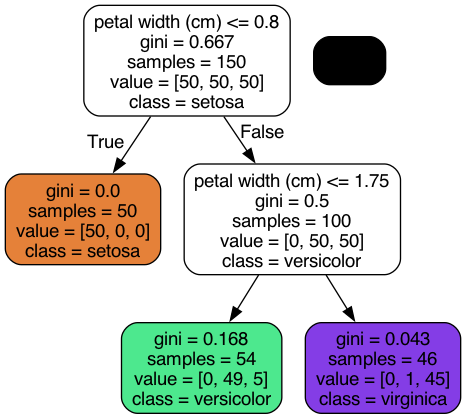

In [39]:

makeGraph(tree = tree_clf, feature_name=iris.feature_names[2:],class_name= iris.target_names)

The following decision tree works as following :

1. **Start at the Root Node (Depth 0):**
   - The root node checks if the flower's petal length is smaller than 2.45 cm.

2. **If Petal Length $<$ 2.45 cm:**
   - Move to the left child node (Depth 1, Left).
   - This is a leaf node, so the predicted class is **Iris-Setosa**.

3. **If Petal Length $\geq$ 2.45 cm:**
   - Move to the right child node (Depth 1, Right).
   - This node asks if the petal width is smaller than 1.75 cm.

4. **If Petal Width $<$ 1.75 cm:**
   - Move to the left child node (Depth 2, Left).
   - The predicted class is **Iris-Versicolor**.

5. **If Petal Width $\geq$ 1.75 cm:**
   - Move to the right child node (Depth 2, Right).
   - The predicted class is **Iris-Virginica**.


One of the many qualities of Decision Trees is that they require very little data preparation. In particular, they don’t require feature scaling or centering at all.

Explanation of the decision tree node attributes:

- **Samples**: The number of training instances a node applies to. 
  - Example: At depth 1 (right), 100 instances have a petal length > 2.45 cm. Of these, 54 have a petal width < 1.75 cm (depth 2, left).

- **Value**: The number of training instances of each class at a node.
  - Example: The bottom-right node has 0 Iris-Setosa, 1 Iris-Versicolor, and 45 Iris-Virginica instances.

- **Gini**: A measure of node impurity. A node is "pure" (gini=0) if all instances belong to the same class.
  - Example: The depth-1 left node, which applies only to Iris-Setosa instances, is pure with a gini score of 0.
  - For example, the depth-2 left node has a gini score equal to $1 – (0/54)^2 – (49/54)^2 – (5/54)^2 \approx 0.168$.

$$\begin{align*} 
\text{Equation : Gini impurity} \\  
G_{i} = 1 - \sum^{n}_{k=1} \wp_{i,k}^{2} \\ 
\end{align*}$$

$\wp_{i,k}$ is the ratio of class k instances among the training instances in the  $i^{th}$ node.

## Estimating Class Probabilities

